# 發出一個例外
---

In [1]:
class EvenOnly(list):
    def append(self, integer):
        if not isinstance(integer, int):
            raise TypeError("Only integers can be added")
        if integer % 2:
            raise ValueError("Only even number can be added")
        super().append(integer)

In [2]:
e = EvenOnly()
e.append("string")

TypeError: Only integers can be added

In [3]:
e.append(3)

ValueError: Only even number can be added

# 例外的作用
---
拋出例外時  
會立即停止程式  

In [4]:
def no_return():
    print("I am about to raise an exception")
    raise Exception('This is always raised')
    print("This line will never execute")
    return "I won't be returned"

In [5]:
no_return()

I am about to raise an exception


Exception: This is always raised

In [6]:
def call_exceptor():
    print("call_exceptor starts here")
    no_return()
    print("an exception was raised")
    print("...so these lines don't run")

In [7]:
call_exceptor()

call_exceptor starts here
I am about to raise an exception


Exception: This is always raised

# 處理例外
---

In [8]:
try:
    no_return()
except:
    print("I caught an exception")
print("executed after the exception")

I am about to raise an exception
I caught an exception
executed after the exception


In [9]:
def funny_division(divider):
    try:
        return 100/divider
    except ZeroDivisionError:
        return "Zero is not a good idea"

print(funny_division(0))
print(funny_division(100))
print(funny_division("hello"))

Zero is not a good idea
1.0


TypeError: unsupported operand type(s) for /: 'int' and 'str'

In [10]:
def funny_division2(anum):
    try:
        if anum == 13:
            raise ValueError("13 is an unlucky number")
        return 100/anum
    except (ZeroDivisionError, TypeError):
        return "Enter a number other than zero"

for val in (0, 'hello', 50.0, 13):
    print(f'Testing {val}: ', end=' ')
    print(funny_division2(val))

Testing 0:  Enter a number other than zero
Testing hello:  Enter a number other than zero
Testing 50.0:  2.0
Testing 13:  

ValueError: 13 is an unlucky number

In [11]:
try:
    raise ValueError("This is an argument")
except ValueError as e:
    print("The exception arguments were", e.args)

The exception arguments were ('This is an argument',)


`e.args` 可拋出 `raise` 裡傳給 `ValueError` 的字串參數

例外處理還支援了 `else` 和 `finally` 兩個語法

In [26]:
import random
some_exceptions = [ValueError, TypeError, IndexError, None]

try:
    choice = random.choice(some_exceptions)
    print(f'raising {choice}')
    if choice:
        raise choice("An error")
except ValueError:
    print("Caught a ValueError")
except TypeError:
    print("Caught a TypeError")
except Exception as e:
    print(f"Caught some other error: {e.__class__.__name__}")
else:
    print("This is code called if there is no exception")
finally:
    print("This cleanup code is always called")

raising None
This is code called if there is no exception
This cleanup code is always called


`else` 是在`try`中沒有任何 `Error` 發生時會連帶執行的區塊  
`finally` 是不管有沒有 `Error` 最後都一定要執行的區塊  
適合用在  
* 清除資料庫連線
* 關閉開啟的檔案
* 發送關閉連線通知

# 例外階層
---
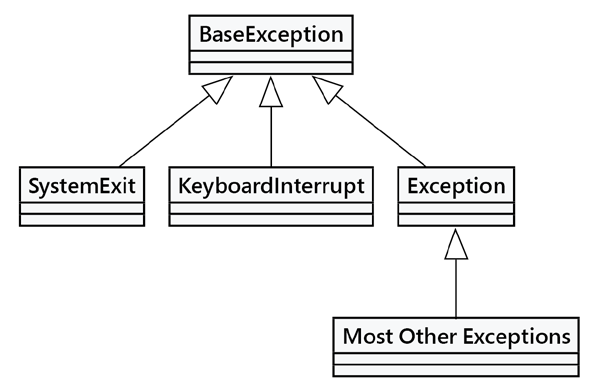  
`SystemExit`、`KeyboardInterrupt`、`Exception` 都是繼承自`BaseException`  
其餘大部分的 `Error` 都是繼承自 `Exception`  
假如 `except`: 後面沒有放參數，捕捉的會是 `BaseException`，這樣很不明智  
想要捕捉 `SystemExit`、`KeyboardInterrupt` 以外的 `Error`  
`except` 後面記得加 `exception`


# 自訂例外
---

In [28]:
class InvalidWithdrawal(Exception):
    pass

raise InvalidWithdrawal("You don't have $50 in your account")

InvalidWithdrawal: You don't have $50 in your account

In [30]:
class InvalidWithdrawal(Exception):
    def __init__(self, balance, amount):
        super().__init__(f"account don't have ${amount}")
        self.amount = amount
        self.balance = balance
        
    def overage(self):
        return self.amount - self.balance
    
raise InvalidWithdrawal(25,50)

InvalidWithdrawal: account don't have $50

In [32]:
try:
    raise InvalidWithdrawal(25,50)
except InvalidWithdrawal as e:
    print(f"I'm sorry, but your withdrawal is more than your balance by ${e.overage()}")

I'm sorry, but your withdrawal is more than your balance by $25


自訂例外對於程式架構、函式庫、API很有幫助  
確保程式拋出的例外是有意義的  
並且容易處理並清楚描述狀況  

# 案例研究
---
1. 一位植物學家提供的專業資料，會被用在分類器中的 Train 和測試分類器準確度，沒法保證會不會因為意外而使資料出了差錯
2. 研究員提供不知道什麼品種的資料，丟進分類器詢問品種，但資料可能含有各種品質問題  

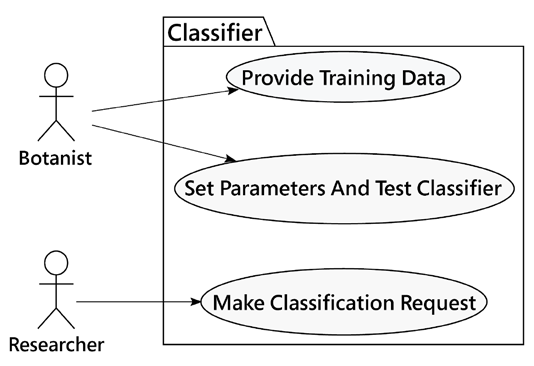  
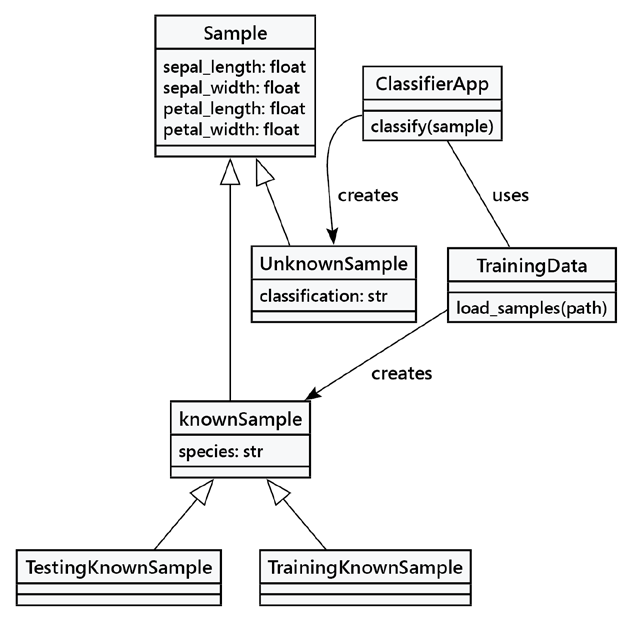

幫助研究人員知道資料品質有問題以至於不能丟進程式  
先自訂一個例外處理  

In [34]:
class InvalidSampleError(ValueError):
    """Source data file has invalid data representation"""

建立 Sample Class

In [55]:
class Sample():
    def __init__(self, sepal_length: float, sepal_width: float, petal_length: float, petal_width: float):
        self.sepal_length = sepal_length
        self.sepal_width = sepal_width
        self.petal_length = petal_length
        self.petal_width = petal_width

建立 KnownSample 繼承 Sample

In [56]:
class KnownSample(Sample):
    
    def __init__(self, species: str, sepal_length: float, sepal_width: float, petal_length: float, petal_width: float):
        super().__init__(sepal_length=sepal_length, sepal_width=sepal_width, petal_length=petal_length, petal_width=petal_width)
        self.species = species
    
    def __repr__(self) -> str:
        return(
            f"{self.__class__.__name__}("
            f"sepal_length={self.sepal_length}, "
            f"sepal_width={self.sepal_width}, "
            f"petal_length={self.petal_length}, "
            f"petal_width={self.petal_width}, "
            f"species={self.species}, "
            f")"
        )
    
    @classmethod
    def from_dict(cls, row) -> "KnownSample":
        if row["species"] not in {"Iris-setosa","Iris-versicolour","Iris-virginica"}:
            raise InvalidSampleError(f"invalid species in {row!r}")  
        try:
            return cls(
                species=row["species"],
                sepal_length=float(row["sepal_length"]),
                sepal_width=float(row["sepal_width"]),
                petal_length=float(row["petal_length"]),
                petal_width=float(row["petal_width"]),
            )
        except ValueError as e:
            raise InvalidSampleError(f"invalid {row!r}")

In [57]:
from typing import cast
class TrainingKnownSample(KnownSample):
    @classmethod
    def from_dict(cls, row) -> "TrainingKnownSample":
        return cast(TrainingKnownSample, super().from_dict(row))

In [58]:
valid = {"sepal_length": "5.1", 
         "sepal_width": "3.5", 
         "petal_length": "1.4", 
         "petal_width": "0.2",
         "species": "Iris-setosa"}

In [59]:
rks = TrainingKnownSample.from_dict(valid)

In [60]:
rks

TrainingKnownSample(sepal_length=5.1, sepal_width=3.5, petal_length=1.4, petal_width=0.2, species=Iris-setosa, )

In [61]:
valid = {"sepal_length": "5.1", 
         "sepal_width": "3.5", 
         "petal_length": "1.4", 
         "petal_width": "0.2",
         "species": "Iris-setosa123"}
rks = TrainingKnownSample.from_dict(valid)

InvalidSampleError: invalid species in {'sepal_length': '5.1', 'sepal_width': '3.5', 'petal_length': '1.4', 'petal_width': '0.2', 'species': 'Iris-setosa123'}

In [62]:
from typing import cast
class TestingKnownSample(KnownSample):
    @classmethod
    def from_dict(cls, row) -> "TrainingKnownSample":
        return cast(TrainingKnownSample, super().from_dict(row))

In [63]:
import datetime

class TrainingData:
    
    def __init__(self, name: str):
        self.name = name
        self.uploaded: datetime.datetime
        self.tested: datetime.datetime
        self.training: list[TrainingKnownSample] = []
        self.testing: list[TestingKnownSample] = []
        self.tuning: list[Hyperparameter] = []
    
    def load(self, raw_data_iter):
        for n, row in enumerate(raw_data_iter):
            try:
                if n % 5 == 0:
                    test = TestingKnownSample.from_dict(row)
                    self.testing.append(test)
                else:
                    train = TrainingKnownSample.from_dict(row)
                    self.training.append(train)
            except InvalidSampleError as e:
                print(f"Row {n+1}: {e}")
                return
        self.uploaded = datetime.datetime.now(tz=datetime.timezone.utc)